In [ ]:
import numpy as np      # library for mathematical matrix operations
import matplotlib.pyplot as plt     # library for visualization  
from matplotlib import image
import tensorflow as tf
import keras
import pathlib
from pathlib import Path
import PIL
from PIL import Image
import os
import random
import time

In [ ]:
"""from google.colab import drive

drive.mount('/content/gdrive')"""

"from google.colab import drive\n\ndrive.mount('/content/gdrive')"

In [ ]:
#ReLU activation function for hidden layers
def relu(input_layer):
	return np.array(np.maximum(0,x) for x in input_layer)
 
def der_ReLU(input_layer):
  dr = [1 if value>0 else 0 for value in input_layer]
  return np.array(dr, dtype=float)
 
def sigmoid(input_layer):
	exp_vals = np.multiply(-1,input_layer)
	exp_vals = np.exp(exp_vals)
	denom = np.add(1,exp_vals)
	s = np.divide(1,denom)
	return s
	
"""def der_sigmoid(input_layer):
		s = sigmoid(input_layer)
		denom = np.multiply(s,-1)
		ds = np.multiply(s,denom) 
		return ds"""

In [ ]:
#Using the structure of layers defined, initializing weight matrices
def generate_weights(layers):
	# layers is a matrix holding the number of nodes in each layer

	# Here we create weights for the untrained neural network (random num)
	# The weight are only assigned till the second last layer, not to the
	# last layer because it is the output layer.
	weights = []
	np.random.seed(1)
	#print("Weight dimention")
	for i in range(len(layers)-1):
		#Adding 1 for bias

		# Below statement creates random weight while matching
		# num(layer[i]) to num(layer[i+1])
		w = 2*np.random.rand(layers[i+1],layers[i])-1

		# add it in the meight matrix
		weights.append(w)
	#weights is a list of numpy arrays
	return weights

In [ ]:
#Feedforward network
def feedforward(x_vector,W):
	# here x_vector is the input layer and W is the weight matrix of network

	# in this function we traverse throught the neural network and
	# create a network matrix of input for all the layers,
	# using transitions from a layer to next with previous inputs.
	# We always add 1 in the network layer for bias.

	# first layer transition with the input array x_vector
	network = [x_vector]
	#print("Network dimention")
	#print("shape network[0]:",network[0].shape)	#, " || item length:",len(network[0][0])
	# We create a network, connecting the nodes of layers with the next layers
	# using the dotproduct of input and weight until second last layer.
	for i in range (len(W)-1):
		# get the input for next layer (curInput.curWeight)
		print(network[-1])
		for j in range (W[i]-1):
		weighted_sum = (np.multiply(network[-1], W[i][j]))

		
		print(weighted_sum)
		hidden_layer_input = relu(weighted_sum)
		# Dot product itself is a scalar value, so you get an array of 
		# same size as next layer from the above code execution.
		
		# we add 1 for bais and update our netwrk matrix by pushing it in.
		network.append(hidden_layer_input)
		#print("shape network[",i+1,"]:",network[i+1].shape)	#,  " || item length:",len(network[i+1][0])
	
	# we are here means we have a built network except between last 2 layers.
	out_layer = relu(np.dot(network[-1],W[-1]))
	network.append(out_layer)
	#print("shape network[-1]:",network[-1].shape)
	#print("network size:", len(network))
	return network

In [ ]:
#Backpropagation through the network
def backprop(network,output_vector,W,learning_rate):
	# Here networ would be a prebuild neural network using feedForward,
	# y_vector is the output label (a matrix in this code), W is weights

	# In this function we create a delta matrix (loss matrix) to update our
	# weights while training the data. We will be traversing in reversed
	# network order for doing that.

	# Starting with our output label and network prediction of the input,
	# we calculate the margin of error and save it in delta for updating
	# the weights later once we have a complete delta matrix.

	deltas = [np.subtract(network[-1],output_vector)]
	#print("shape deltas[0]:", len(deltas[-1]))

	# Loop back in reverse order and find delta values of the remainig layers
	for i in range (len(W)):
		# get the weight of previous layer and multiply it with the error
		# margin of our current layer
		prev_layer = np.dot(W[-1-i],deltas[-1])

		# Add the calculated error margin of prev_layer into delta
		deltas.append(prev_layer)
		#print("shape deltas[",i+1,"]:", len(deltas[-1]))
	
	# The delta values were computed in the reverse order. So reverse deltas
	# to get them in correct order.
	deltas.reverse()
	#print("deltas size:",len(deltas))
	
	# Weight Update (start from here)
	# here, l - label index, i - next layer node index (weight array transition to a next layer node),
	# j - index of the node in current layer to get the weight.
	for l in range(len(W)):
		for i in range(len(W[l])):
			for j in range(len(W[l][i])):
				W[l][i][j] -= learning_rate*deltas[l][i]*network[l][i]

In [ ]:
#Compute accuracy of the network for given weight parameters
def analyse_NN(W, input, label, finalOutput = []):
	# W is the assigned weights, input is list of images pixels
	# and label is the respective output of each images matched
	# with the index values.

	# In this function we calculate the correct prediction percentage
	correct_pred = 0

	# for each image from the input, we compare our prediction with the correct label.
	for i in range(len(input)):
		modelNet = feedforward(input[i],W)
		y_pred = modelNet[-1]
		print(y_pred)
		finalOutput.append(y_pred)
		pred = np.argmax(y_pred)
		# Correct prediction
		if(pred==label[i]):
			correct_pred+=1
	
	#print(finalOutput)
	# return the correct prediction
	return np.round(correct_pred/i,4)

In [ ]:
#Stochastic training for each training data
def train(layers, x_train, y_train, epoch = 40, learning_rate = 0.01):
	W = generate_weights(layers)
	print(W[0].shape)
	for iteration in range(epoch):
		t0 = time.time()
		network = feedforward(x_train,W)
		backprop(network,y_train,W,learning_rate)
		print("Epoch=",iteration+1," Accuracy=",analyse_NN(W,x_train,y_train)," Time=",time.time()-t0)
	return W

#Printing test data accuracy
def testingModel(model, x_test,y_test):
	outputArray = []
	print("Test Data Accuracy",analyse_NN(model,x_test,y_test,outputArray))
	return outputArray

In [ ]:
def createXORDataSet():
    # data is an array which represents 4 different data clusters
    data = []
    # target holds information about which class each respective data points are from
    target = []

    # Here we are just instantiating random points at 4 different places in the graph space
    for i in range(2):
        for j in range(2):
            for _ in range(100):
                if (i+j)%2==0:
                    data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1) + j])
                    target.append([0])
                else:  
                    data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1)+ j] )
                    target.append([1])


    for i in range(len(data)):
        if target[i][0] == 0:
            plt.scatter(data[i][0] ,data[i][1] , c='#F15156', marker = 's', edgecolor = 'black')
        else:
            plt.scatter(data[i][0] ,data[i][1] , c='#FFBD00', marker = '^', edgecolor = 'black')

    plt.show()
    data = np.array(data)
    target = np.array(target)
    return data,target

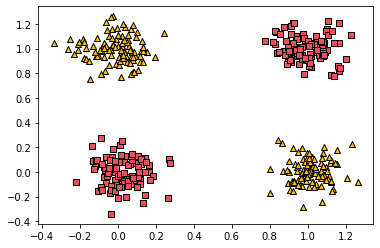

In [ ]:
trainingSet, trainingLabel = createXORDataSet()

In [ ]:
layers = [400] + [100,50] + [1]
print(layers)
model = train(layers, trainingSet, trainingLabel, 10, 0.01)

[400, 100, 50, 1]
(400, 100)
[[ 1.07713008e-01 -7.07376605e-02]
 [ 5.35371900e-02 -4.43854888e-02]
 [-6.19442462e-02 -8.92970013e-02]
 [ 4.78862098e-02  1.24839440e-01]
 [ 7.70459033e-02 -9.57282546e-02]
 [ 3.19301363e-02  8.15282882e-02]
 [ 2.83794305e-02 -4.88891998e-02]
 [ 9.17748017e-02 -2.97977479e-02]
 [ 1.73968282e-02  1.39631132e-01]
 [-1.22600078e-01  4.94466979e-02]
 [ 7.51278303e-02  1.20139223e-01]
 [-1.35254821e-02 -1.01694210e-03]
 [-1.03587024e-01 -1.53800573e-01]
 [ 1.66691827e-01  5.54462438e-02]
 [ 1.16007555e-01 -6.81809633e-03]
 [-8.81762067e-02  2.72104132e-01]
 [ 2.87304180e-02 -9.63475626e-02]
 [-2.18415928e-01 -7.84301954e-02]
 [-6.73482834e-02  1.21580487e-02]
 [-1.47143404e-02  4.92433232e-02]
 [ 1.31653357e-01 -2.53760404e-01]
 [-1.22108862e-01  9.25554700e-02]
 [-1.31086656e-01  8.97894869e-02]
 [ 2.62176802e-01 -2.10504187e-01]
 [-7.52192669e-02 -4.28192577e-02]
 [-1.02513717e-03 -2.07924853e-01]
 [-1.14061601e-01  9.67858607e-02]
 [ 2.42911706e-02 -9.66607

ValueError: ignored

In [ ]:
testingSet, testingLabel = createDataSet(testingDataPath)
testingSet = testingSet/255

#testingLabel[0] = 3

In [ ]:
predictions = testingModel(model, testingSet, testingLabel)
print(predictions)

In [ ]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  rando = random.randint(0, testingLabel.size -1)
  #review the plot_image function above
  plot_image(rando, predictions[rando], testingLabel, testingSet)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #review the plot_value_array function above
  plot_value_array(rando, predictions[rando], testingLabel)
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(trainingSet, trainigLabel, epochs=10)

#test_loss, test_acc = model.evaluate(testingSet, testingLabel, verbose=2)
#print('Test accuracy :', test_acc)
#print('Test loss : ', test_loss)

In [ ]:
predictionModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = predictionModel.predict(testingSet)
print(predictions)

#print(predictions[0])

#print(np.argmax(predictions[0]))       # predicted label
#print(testingLabel[0])                 # test label

#### Ploting the predictions
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    rando = random.randint(0, testingLabel.size -1)
    #review the plot_image function above
    plot_image(rando, predictions[rando], testingLabel, testingSet)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    #review the plot_value_array function above
    plot_value_array(rando, predictions[rando], testingLabel)
plt.tight_layout()
plt.show()